# Population change correlation analysis

This Notebook contains the analysis for correlations with population change from 2010 to 2020 with Accessibility, Marginalization and House density

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


# AMG

In [2]:
c = 'Guadalajara'
res = 8

## Accessibility

Download accessibility hex_bins

In [3]:
df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_bins = gpd.GeoDataFrame()
hex_folder = 'hex_bins_index_2020'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM processed.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_bins = hex_bins.append(aup.gdf_from_query(query, geometry_col='geometry'))

In [4]:
print(hex_bins.shape)
hex_bins.head(2)

(2969, 19)


,idx_accessibility,idx_hospitales,idx_supermercado,idx_farmacias,node_count,wAcc,wHsp,wSpm,wFrm,idx_accessibility_wavg,idx_hospitales_wavg,idx_supermercado_wavg,idx_farmacias_wavg,geometry,hex_id_8,CVEGEO,dist_farmacia,dist_hospitales,dist_supermercados
0,0.000157,0.000473,5.887650e-24,2.189688e-23,5,0.000787,0.002364,2.943825e-23,1.094844e-22,4.657651e-09,1.398694e-08,1.742094e-28,6.479058e-28,"POLYGON ((-103.54324 20.40862, -103.54269 20.4...",8849aa2611fffff,14002,9041.266800,9983.789800,9250.494800
1,0.000343,0.001031,1.124020e-21,4.180368e-21,12,0.004118,0.012368,1.348825e-20,5.016442e-20,2.437182e-08,7.318864e-08,7.982061e-26,2.968625e-25,"POLYGON ((-103.54722 20.40036, -103.54269 20.4...",8849aa261bfffff,14002,8371.216417,9313.739417,8580.444417


<AxesSubplot:>

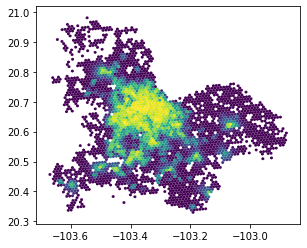

In [5]:
hex_bins.loc[hex_bins.idx_accessibility>0].plot('idx_accessibility')

## Marginalization

Download marginalization hex_bins

In [6]:
df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_marg = gpd.GeoDataFrame()
hex_folder = 'hex_bins_marg_2020'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM censo.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_marg = hex_marg.append(aup.gdf_from_query(query, geometry_col='geometry'))

In [7]:
print(hex_marg.shape)
hex_marg.head(2)

(1163, 17)


,geometry,hex_id_8,CVEGEO,pobtot,p6a14nae,sbasc,psdss,ovsde,ovsee,ovsae,ovpt,ovsref,ovsint,ovscel,ovhac,im_2020,imn_2020
0,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",8849abc9ebfffff,14002,273.168550,0.474944,2.828432,1.787101,0.1098,0.008903,0.115735,0.029676,0.697379,4.282201,0.593514,2.756871,120.556725,0.941744
1,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",8849abc9e3fffff,14002,89.333336,1.282051,7.092198,7.960199,0.0000,0.000000,0.621891,0.000000,1.492537,15.049751,0.373134,8.333333,122.339516,0.955670


<AxesSubplot:>

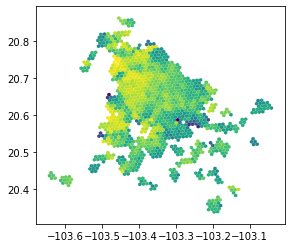

In [8]:
hex_marg.plot('imn_2020')

## Population change

In [10]:
hex_pop = gpd.read_file(f'../data/processed/pop_chng/{c}_Census_10_20_BlockAnalysis_res{res}.geojson')
print(hex_pop.shape)
hex_pop.head(2)

(1160, 430)


,hex_id_8,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,...,Z_RTViv_10_20,R_VivHab_20,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,R_TVivDes_10_20,DensPob_10_20,geometry
0,8849aa2d99fffff,848.0,427.0,421.0,46.0,16.0,24.0,794.0,403.0,391.0,...,None,0.716981,0.160377,-0.281484,0.0,None,0.716981,None,-2.276028,"POLYGON ((-103.32340 20.57940, -103.31887 20.5..."
1,88498c95cbfffff,7259.0,3697.0,3557.0,310.0,149.0,128.0,6899.0,3510.0,3389.0,...,None,0.839589,0.083110,0.391420,0.0,None,0.839589,None,-4.227884,"POLYGON ((-103.29386 20.71601, -103.28932 20.7..."


<AxesSubplot:>

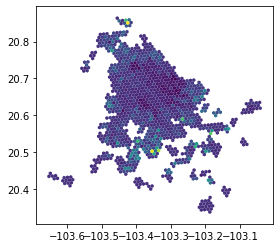

In [11]:
hex_pop.plot('T_Pob_10_20')

## Correlation analysis

In [12]:
import numpy as np

hex_corr = pd.merge(hex_pop[['hex_id_8','T_Pob_10_20',
                            'R_TVivDes_10_20','geometry']], hex_bins[['hex_id_8','idx_accessibility']],
                   on='hex_id_8')
hex_corr = pd.merge(hex_corr, hex_marg[['hex_id_8','imn_2020']], on='hex_id_8')
print(hex_corr.shape)
hex_corr.head(2)

(1126, 6)


,hex_id_8,T_Pob_10_20,R_TVivDes_10_20,geometry,idx_accessibility,imn_2020
0,8849aa2d99fffff,-197.0,None,"POLYGON ((-103.32340 20.57940, -103.31887 20.5...",0.542387,0.939849
1,88498c95cbfffff,-366.0,None,"POLYGON ((-103.29386 20.71601, -103.28932 20.7...",0.682275,0.942672


### Accessibility vs Population change

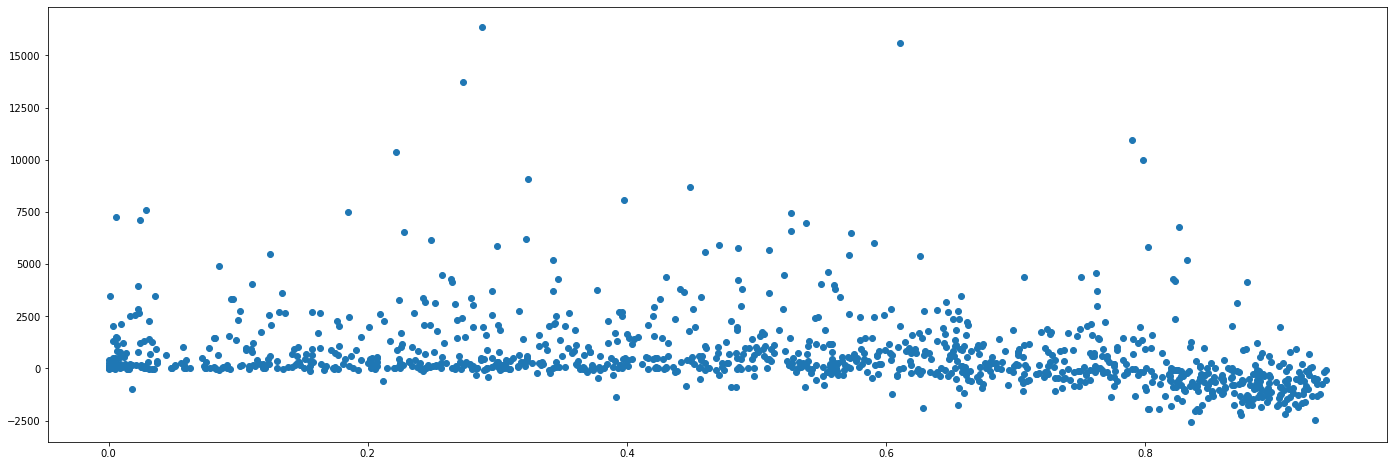

In [13]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.idx_accessibility, hex_corr.T_Pob_10_20)

In [14]:
x = np.array(hex_corr.idx_accessibility)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[ 1.       , -0.2397116],
       [-0.2397116,  1.       ]])

### Marginalization vs Population change

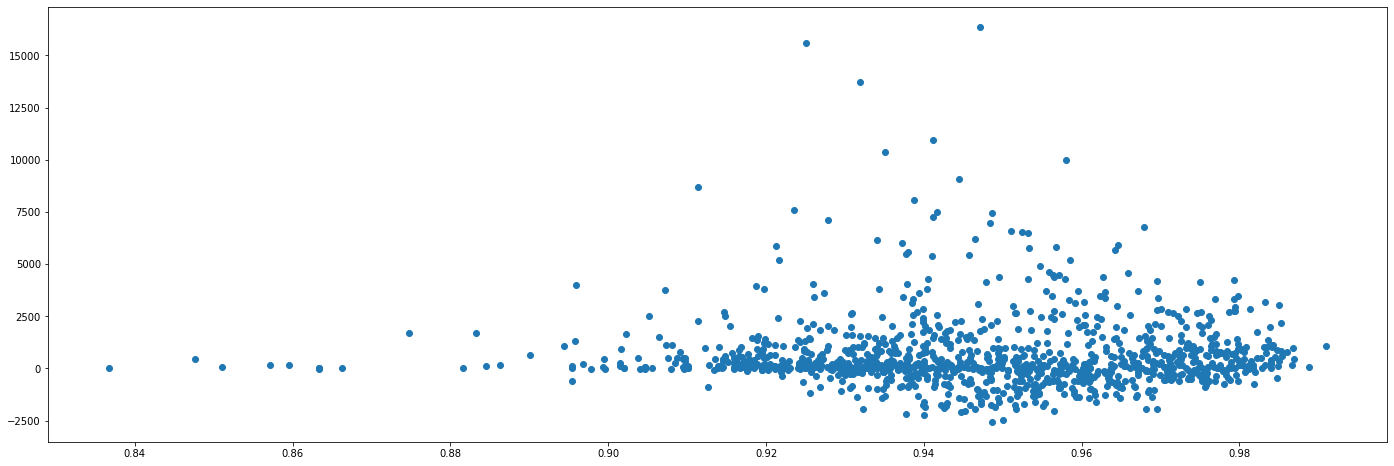

In [15]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.imn_2020, hex_corr.T_Pob_10_20)

In [16]:
x = np.array(hex_corr.imn_2020)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[ 1.        , -0.00376165],
       [-0.00376165,  1.        ]])

### House change vs Population change

(0.0, 1.0)

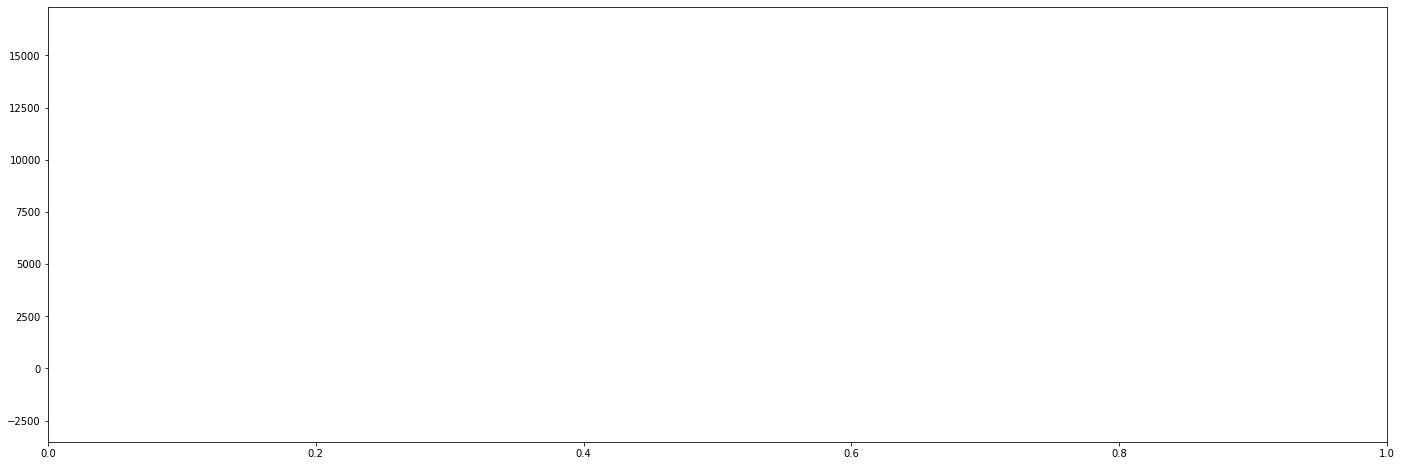

In [17]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.R_TVivDes_10_20, hex_corr.T_Pob_10_20)

ax.set_xlim([0, 1])

In [18]:
x = np.array(hex_corr.R_TVivDes_10_20)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

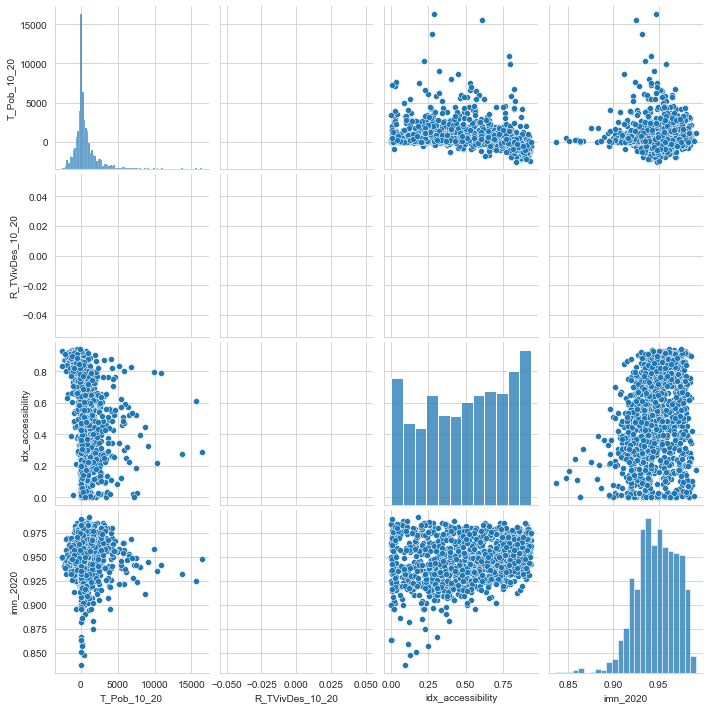

In [19]:
import seaborn as sns

sns.set_style('whitegrid')
sns.pairplot(hex_corr, palette='deep')
plt.show()

## Boxplots

### Group data marginalization

In [20]:
hex_corr['Grado_Marg'] = np.nan
hex_corr.loc[hex_corr.imn_2020>=0.966338 , 'Grado_Marg'] = 'Muy bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.946436 )&
             (hex_corr.imn_2020<0.966338), 'Grado_Marg'] = 'Bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.926536)&
             (hex_corr.imn_2020<0.946436), 'Grado_Marg'] = 'Medio'
hex_corr.loc[(hex_corr.imn_2020>=0.8999)&
             (hex_corr.imn_2020<0.926536), 'Grado_Marg'] = 'Alto'
hex_corr.loc[hex_corr.imn_2020 < 0.8999, 'Grado_Marg'] = 'Muy alto'

<AxesSubplot:>

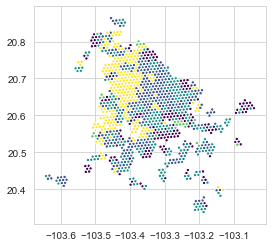

In [21]:
hex_corr.plot('Grado_Marg', 'viridis')

<AxesSubplot:>

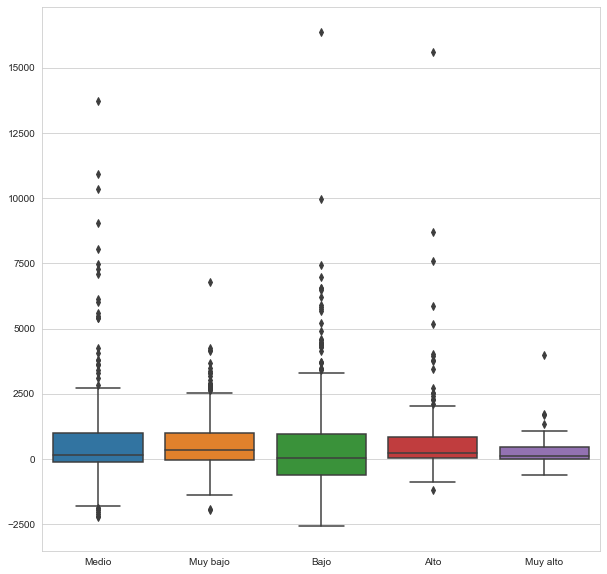

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x=np.array(hex_corr.Grado_Marg) , y=np.array(hex_corr.T_Pob_10_20), ax=ax)

In [23]:
hex_corr.groupby('Grado_Marg').agg(['median','mean','std'])

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


T_Pob_10_20                          R_TVivDes_10_20           \
                median        mean          std          median mean std   
Grado_Marg                                                                 
Alto             247.5  769.916667  1685.362507             NaN  NaN NaN   
Bajo              27.0  567.490741  2059.320426             NaN  NaN NaN   
Medio            167.0  669.344311  1888.972282             NaN  NaN NaN   
Muy alto         124.0  456.730769   908.310676             NaN  NaN NaN   
Muy bajo         364.0  633.488550  1148.505028             NaN  NaN NaN   

           idx_accessibility                      imn_2020                      
                      median      mean       std    median      mean       std  
Grado_Marg                                                                      
Alto                0.367757  0.373619  0.228632  0.918960  0.917622  0.006467  
Bajo                0.706292  0.613467  0.274646  0.955649  0.955840  0.005597  
Medio               0.511655  0.486443  0.268473  0.937461  0.936986  0.005279  
Muy alto            0.187259  0.192523  0.161036  0.885449  0.879788  0.019057  
Muy bajo            0.553842  0.501355  0.302406  0.975153  0.975306  0.005496

### Group by accessibility

In [24]:
hex_corr['Nivel_Acc'] = np.nan
hex_corr.loc[hex_corr.idx_accessibility>=0.75 , 'Nivel_Acc'] = 'Alto'
hex_corr.loc[(hex_corr.idx_accessibility>=0.50 )&
             (hex_corr.idx_accessibility<0.75), 'Nivel_Acc'] = 'Medio'
hex_corr.loc[(hex_corr.idx_accessibility>=0.25)&
             (hex_corr.idx_accessibility<0.50), 'Nivel_Acc'] = 'Bajo'
hex_corr.loc[hex_corr.idx_accessibility < 0.25, 'Nivel_Acc'] = 'Muy bajo'

<AxesSubplot:>

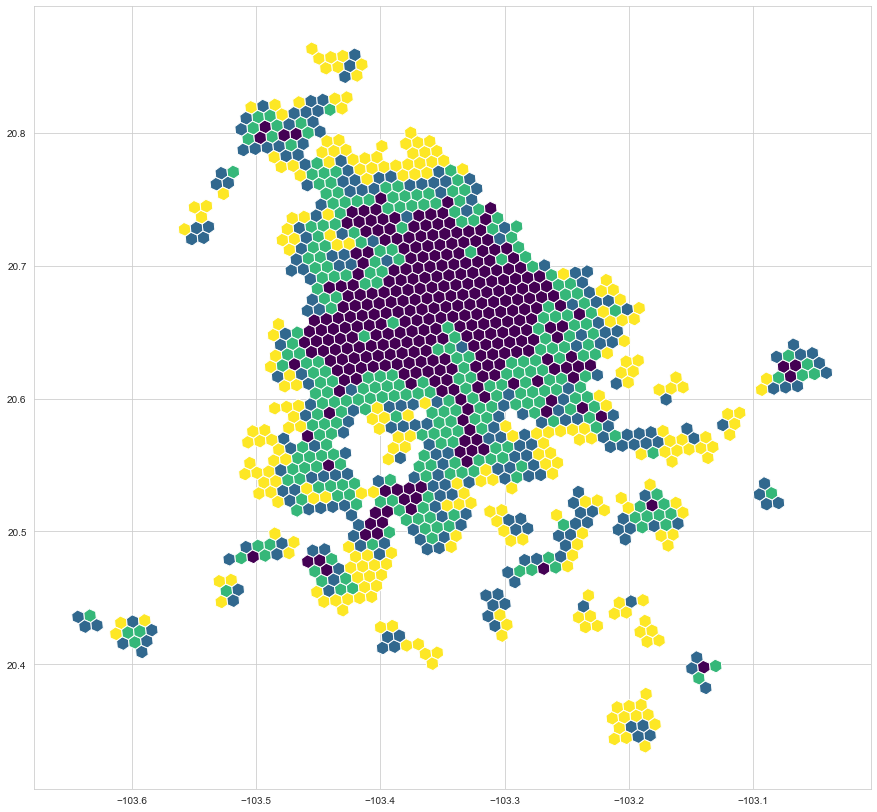

In [25]:
fig, ax = plt.subplots(figsize=(15,15))

hex_corr.plot('Nivel_Acc', 'viridis', ax=ax)

In [31]:
from pandas.api.types import CategoricalDtype

#categorical data
cat_list = ['Alto','Medio','Bajo','Muy bajo']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_corr['Nivel_Acc'] = hex_corr['Nivel_Acc'].astype(cat_size_order)
hex_corr = hex_corr.sort_values('Nivel_Acc')

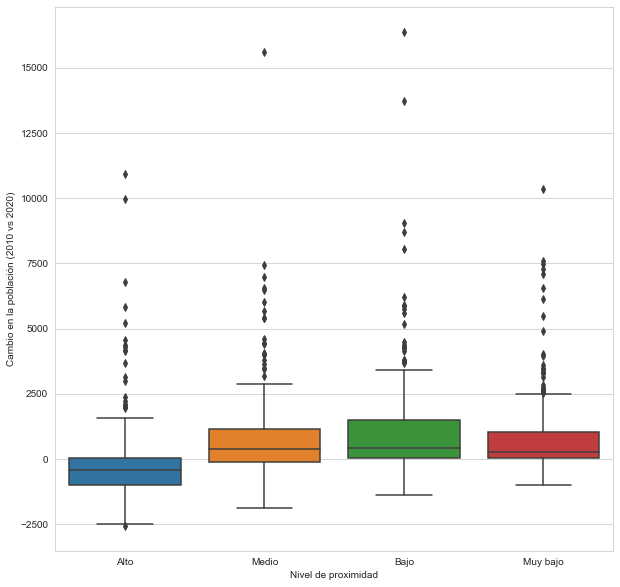

In [33]:
fig, ax = plt.subplots(figsize=(10,10))

x = np.array(hex_corr.Nivel_Acc)
y = np.array(hex_corr.T_Pob_10_20)

sns.boxplot(x=x , y=y, ax=ax)

plt.xlabel('Nivel de proximidad')
plt.ylabel('Cambio en la población (2010 vs 2020)')

plt.savefig(f'../data/processed/pop_chng/{c}_BoxPlot_PopChange_ProximityGrpup_res{res}.svg')

In [71]:
hex_corr.groupby('Nivel_Acc').agg(['median','mean','std'])

T_Pob_10_20                           R_TVivDes_10_20            \
               median         mean          std          median      mean   
Nivel_Acc                                                                   
Alto       -268.32025  -218.672946  1749.909394        0.046644  0.162383   
Bajo        431.85675  1098.784012  1914.507258        0.219116  2.234936   
Medio       559.46660   819.344970  1589.351223        0.004070  2.082496   
Muy bajo    256.37612   847.816527  1433.971819        0.450904  4.728699   

                     idx_accessibility                      imn_2020  \
                 std            median      mean       std    median   
Nivel_Acc                                                              
Alto        0.889086          0.851810  0.849433  0.052948  0.955330   
Bajo       10.730994          0.369972  0.371553  0.074230  0.940598   
Medio      31.330844          0.627565  0.624577  0.070630  0.945796   
Muy bajo   18.169953          0.094972  0.102662  0.082778  0.939129   

                               
               mean       std  
Nivel_Acc                      
Alto       0.955024  0.014661  
Bajo       0.942222  0.023239  
Medio      0.947158  0.019866  
Muy bajo   0.941371  0.030128

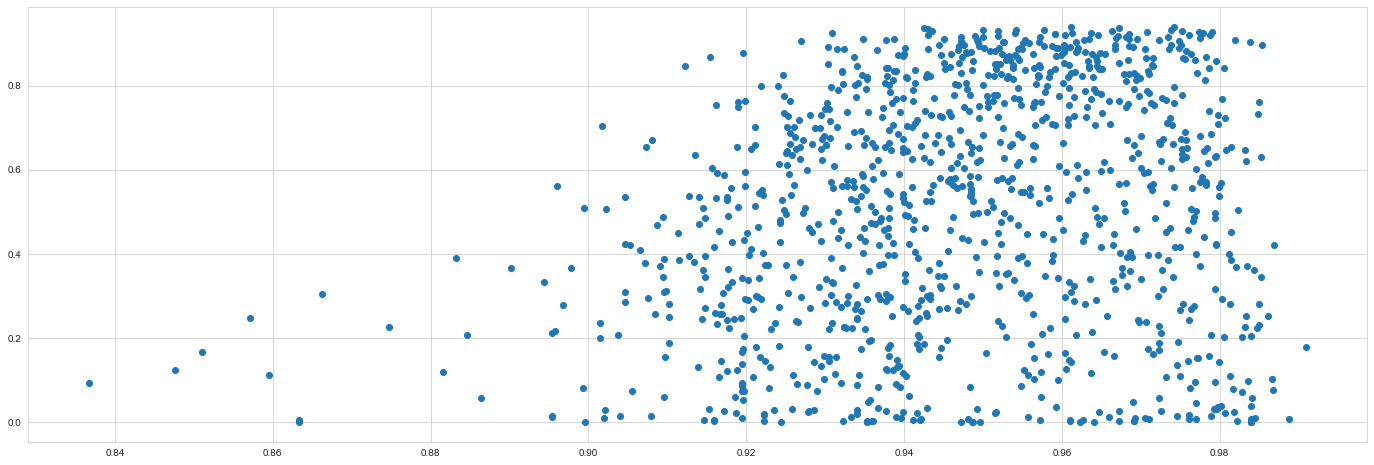

In [25]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.imn_2020, hex_corr.idx_accessibility)

In [26]:
x = np.array(hex_corr.imn_2020).reshape((1,-1))
y = np.array(hex_corr.idx_accessibility).reshape((1,-1))
np.corrcoef(x, y)

array([[1.        , 0.21447325],
       [0.21447325, 1.        ]])

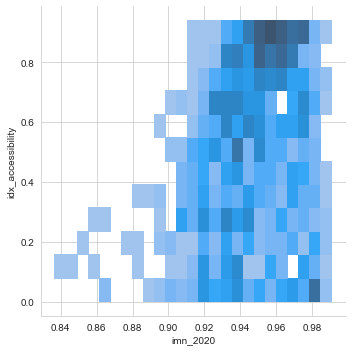

In [27]:
sns.displot(hex_corr, x='imn_2020',y='idx_accessibility')

# Monterrey

In [34]:
c = 'Monterrey'
res = 8

In [35]:
# df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_bins = gpd.GeoDataFrame()
hex_folder = 'hex_bins_index_2020'
# c = 'Monterrey'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM processed.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_bins = hex_bins.append(aup.gdf_from_query(query, geometry_col='geometry'))
    
print(hex_bins.shape)

(3809, 19)


In [36]:
# df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_marg = gpd.GeoDataFrame()
hex_folder = 'hex_bins_marg_2020'
# c = 'Monterrey'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM censo.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_marg = hex_marg.append(aup.gdf_from_query(query, geometry_col='geometry'))
print(hex_marg.shape)

(1463, 17)


In [37]:
hex_pop = gpd.read_file(f'../data/processed/pop_chng/{c}_Census_10_20_BlockAnalysis_res{res}.geojson')
print(hex_pop.shape)
hex_pop.head(2)

(1490, 430)


,hex_id_8,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,...,Z_RTViv_10_20,R_VivHab_20,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,R_TVivDes_10_20,DensPob_10_20,geometry
0,8848a205b1fffff,10619.0,5338.0,5281.0,447.0,156.0,187.0,10127.0,5100.0,5027.0,...,None,0.898835,0.059779,0.660828,0.0,None,0.898835,None,41.426663,"POLYGON ((-100.33358 25.79790, -100.32883 25.8..."
1,8848a21105fffff,304.0,136.0,156.0,4.0,0.0,3.0,129.0,52.0,75.0,...,None,0.793388,0.049587,0.158093,0.0,None,0.793388,None,2.413829,"POLYGON ((-100.16099 25.45600, -100.15625 25.4..."


In [38]:
import numpy as np

hex_corr = pd.merge(hex_pop[['hex_id_8','T_Pob_10_20',
                            'R_TVivDes_10_20','geometry']], hex_bins[['hex_id_8','idx_accessibility']],
                   on='hex_id_8')
hex_corr = pd.merge(hex_corr, hex_marg[['hex_id_8','imn_2020']], on='hex_id_8')
print(hex_corr.shape)
hex_corr.head(2)

(1421, 6)


,hex_id_8,T_Pob_10_20,R_TVivDes_10_20,geometry,idx_accessibility,imn_2020
0,8848a205b1fffff,3557.0,None,"POLYGON ((-100.33358 25.79790, -100.32883 25.8...",0.707410,0.978164
1,8848a21105fffff,207.0,None,"POLYGON ((-100.16099 25.45600, -100.15625 25.4...",0.061643,0.935282


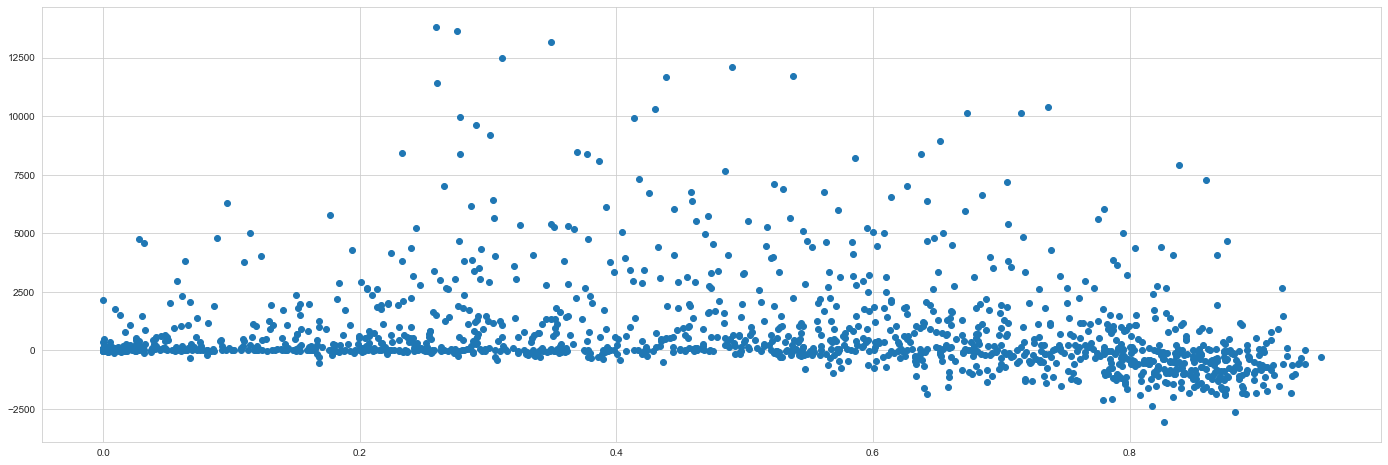

In [39]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.idx_accessibility, hex_corr.T_Pob_10_20)

In [40]:
x = np.array(hex_corr.idx_accessibility)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[ 1.        , -0.13438812],
       [-0.13438812,  1.        ]])

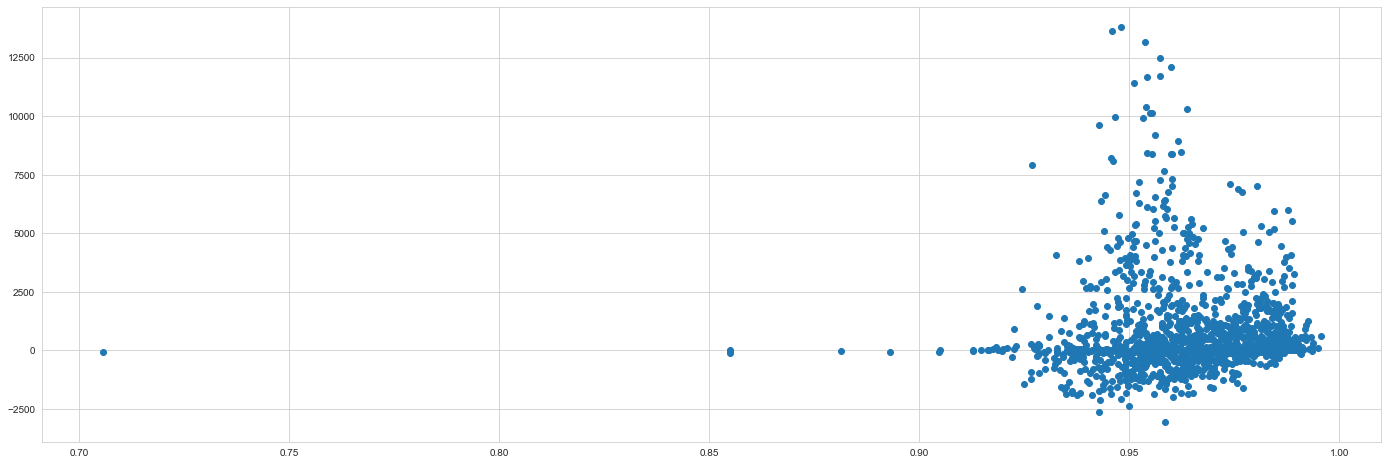

In [41]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.imn_2020, hex_corr.T_Pob_10_20)

In [42]:
x = np.array(hex_corr.imn_2020)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[1.        , 0.03272964],
       [0.03272964, 1.        ]])

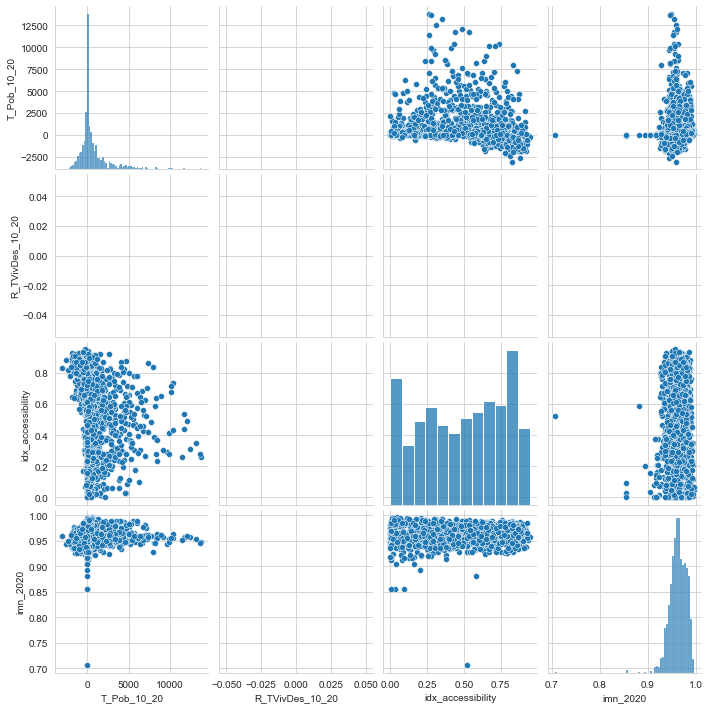

In [43]:
import seaborn as sns

sns.set_style('whitegrid')
sns.pairplot(hex_corr, palette='deep')
plt.show()

In [44]:
hex_corr['Grado_Marg'] = np.nan
hex_corr.loc[hex_corr.imn_2020>=0.966338 , 'Grado_Marg'] = 'Muy bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.946436 )&
             (hex_corr.imn_2020<0.966338), 'Grado_Marg'] = 'Bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.926536)&
             (hex_corr.imn_2020<0.946436), 'Grado_Marg'] = 'Medio'
hex_corr.loc[(hex_corr.imn_2020>=0.8999)&
             (hex_corr.imn_2020<0.926536), 'Grado_Marg'] = 'Alto'
hex_corr.loc[hex_corr.imn_2020 < 0.8999, 'Grado_Marg'] = 'Muy alto'

<AxesSubplot:>

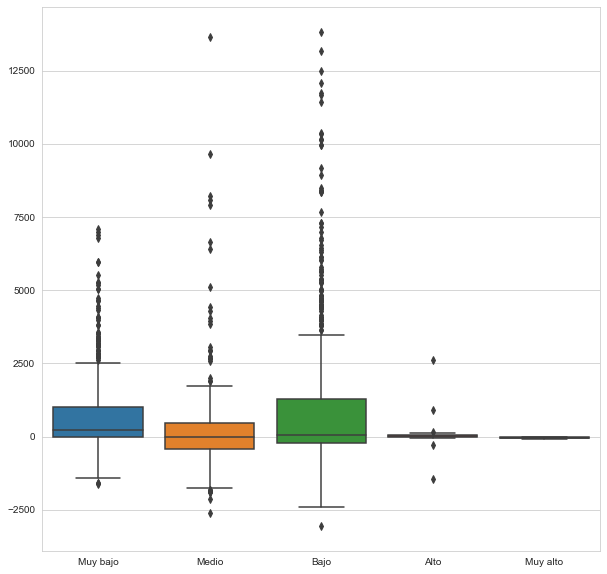

In [45]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x=np.array(hex_corr.Grado_Marg) , y=np.array(hex_corr.T_Pob_10_20), ax=ax)

In [46]:
hex_corr.groupby('Grado_Marg').agg(['median','mean','std'])

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


T_Pob_10_20                           R_TVivDes_10_20           \
                median         mean          std          median mean std   
Grado_Marg                                                                  
Alto              11.0   112.666667   692.620844             NaN  NaN NaN   
Bajo              62.5  1015.861111  2521.414006             NaN  NaN NaN   
Medio             -2.0   414.489691  2060.972835             NaN  NaN NaN   
Muy alto         -38.0   -38.500000    32.389813             NaN  NaN NaN   
Muy bajo         229.5   688.704082  1301.681586             NaN  NaN NaN   

           idx_accessibility                      imn_2020                      
                      median      mean       std    median      mean       std  
Grado_Marg                                                                      
Alto                0.143703  0.198060  0.207926  0.918807  0.917825  0.005528  
Bajo                0.523892  0.489141  0.289404  0.957801  0.957317  0.005494  
Medio               0.457632  0.466023  0.276011  0.939589  0.938973  0.005223  
Muy alto            0.147349  0.239970  0.253546  0.854966  0.840875  0.068153  
Muy bajo            0.552391  0.512265  0.275351  0.977972  0.977883  0.007076

In [47]:
hex_corr['Nivel_Acc'] = np.nan
hex_corr.loc[hex_corr.idx_accessibility>=0.75 , 'Nivel_Acc'] = 'Alto'
hex_corr.loc[(hex_corr.idx_accessibility>=0.50 )&
             (hex_corr.idx_accessibility<0.75), 'Nivel_Acc'] = 'Medio'
hex_corr.loc[(hex_corr.idx_accessibility>=0.25)&
             (hex_corr.idx_accessibility<0.50), 'Nivel_Acc'] = 'Bajo'
hex_corr.loc[hex_corr.idx_accessibility < 0.25, 'Nivel_Acc'] = 'Muy bajo'

In [48]:
#categorical data
cat_list = ['Alto','Medio','Bajo','Muy bajo']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_corr['Nivel_Acc'] = hex_corr['Nivel_Acc'].astype(cat_size_order)
hex_corr = hex_corr.sort_values('Nivel_Acc')

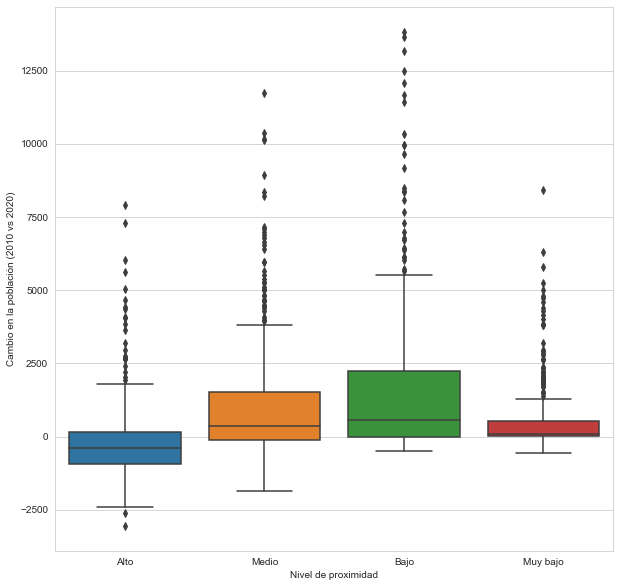

In [49]:
fig, ax = plt.subplots(figsize=(10,10))

x = np.array(hex_corr.Nivel_Acc)
y = np.array(hex_corr.T_Pob_10_20)

sns.boxplot(x=x , y=y, ax=ax)

plt.xlabel('Nivel de proximidad')
plt.ylabel('Cambio en la población (2010 vs 2020)')

plt.savefig(f'../data/processed/pop_chng/{c}_BoxPlot_PopChange_ProximityGrpup_res{res}.svg')

In [50]:
hex_corr.groupby('Nivel_Acc').agg(['median','mean','std'])

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


T_Pob_10_20                           R_TVivDes_10_20           \
               median         mean          std          median mean std   
Nivel_Acc                                                                  
Alto           -391.0  -138.955432  1380.913898             NaN  NaN NaN   
Medio           351.0  1075.469657  2096.688571             NaN  NaN NaN   
Bajo            553.5  1686.842593  2701.160121             NaN  NaN NaN   
Muy bajo         90.0   570.908078  1142.349818             NaN  NaN NaN   

          idx_accessibility                      imn_2020                      
                     median      mean       std    median      mean       std  
Nivel_Acc                                                                      
Alto               0.836317  0.836630  0.046365  0.963979  0.963181  0.013511  
Medio              0.629178  0.626763  0.070012  0.965254  0.963208  0.020262  
Bajo               0.360449  0.369371  0.075933  0.960178  0.961516  0.016743  
Muy bajo           0.107131  0.108644  0.083629  0.961721  0.960958  0.021006

In [51]:
x = np.array(hex_corr.imn_2020).reshape((1,-1))
y = np.array(hex_corr.idx_accessibility).reshape((1,-1))
np.corrcoef(x, y)

array([[1.        , 0.06301018],
       [0.06301018, 1.        ]])

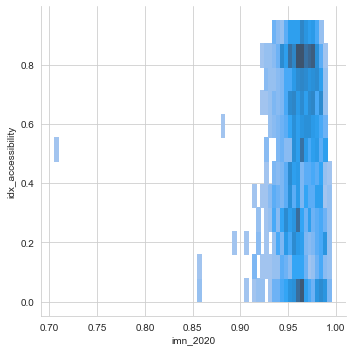

In [52]:
sns.displot(hex_corr, x='imn_2020',y='idx_accessibility')

# ZMVM

In [53]:
c = 'ZMVM'
res = 8

In [54]:
# df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_bins = gpd.GeoDataFrame()
hex_folder = 'hex_bins_index_2020'
# c = 'ZMVM'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM processed.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_bins = hex_bins.append(aup.gdf_from_query(query, geometry_col='geometry'))
    
print(hex_bins.shape)

(6441, 19)


In [55]:
# df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_marg = gpd.GeoDataFrame()
hex_folder = 'hex_bins_marg_2020'
# c = 'ZMVM'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM censo.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_marg = hex_marg.append(aup.gdf_from_query(query, geometry_col='geometry'))
print(hex_marg.shape)

(3777, 17)


In [56]:
hex_pop = gpd.read_file(f'../data/processed/pop_chng/{c}_Census_10_20_BlockAnalysis_res{res}.geojson')
print(hex_pop.shape)
hex_pop.head(2)

(3805, 430)


,hex_id_8,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,...,Z_RTViv_10_20,R_VivHab_20,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,R_TVivDes_10_20,DensPob_10_20,geometry
0,884995d617fffff,2048.0,1135.0,909.0,56.0,20.0,4.0,1978.0,1095.0,883.0,...,None,0.806324,0.106719,-0.244534,0.0,None,0.806324,None,-3.985063,"POLYGON ((-98.77058 19.12263, -98.76607 19.125..."
1,8849952227fffff,1477.0,761.0,711.0,43.0,20.0,12.0,1417.0,729.0,688.0,...,None,0.821355,0.084189,-0.140705,0.0,None,0.821355,None,1.646446,"POLYGON ((-99.07914 19.90662, -99.07460 19.909..."


In [57]:
hex_pop['DensPob_10_20'] = hex_pop['dens_pob_ha'] - hex_pop['10_dens_pob_ha']
hex_pop.to_file(f'../data/processed/pop_chng/{c}_Census_10_20_BlockAnalysis_res{res}.geojson')

In [58]:
import numpy as np

hex_corr = pd.merge(hex_pop[['hex_id_8','T_Pob_10_20',
                            'R_TVivDes_10_20','geometry']], hex_bins[['hex_id_8','idx_accessibility']],
                   on='hex_id_8')
hex_corr = pd.merge(hex_corr, hex_marg[['hex_id_8','imn_2020']], on='hex_id_8')
print(hex_corr.shape)
hex_corr.head(2)

(3633, 6)


,hex_id_8,T_Pob_10_20,R_TVivDes_10_20,geometry,idx_accessibility,imn_2020
0,884995d617fffff,-335.0,None,"POLYGON ((-98.77058 19.12263, -98.76607 19.125...",0.926887,0.940941
1,8849952227fffff,139.0,None,"POLYGON ((-99.07914 19.90662, -99.07460 19.909...",0.699493,0.938725


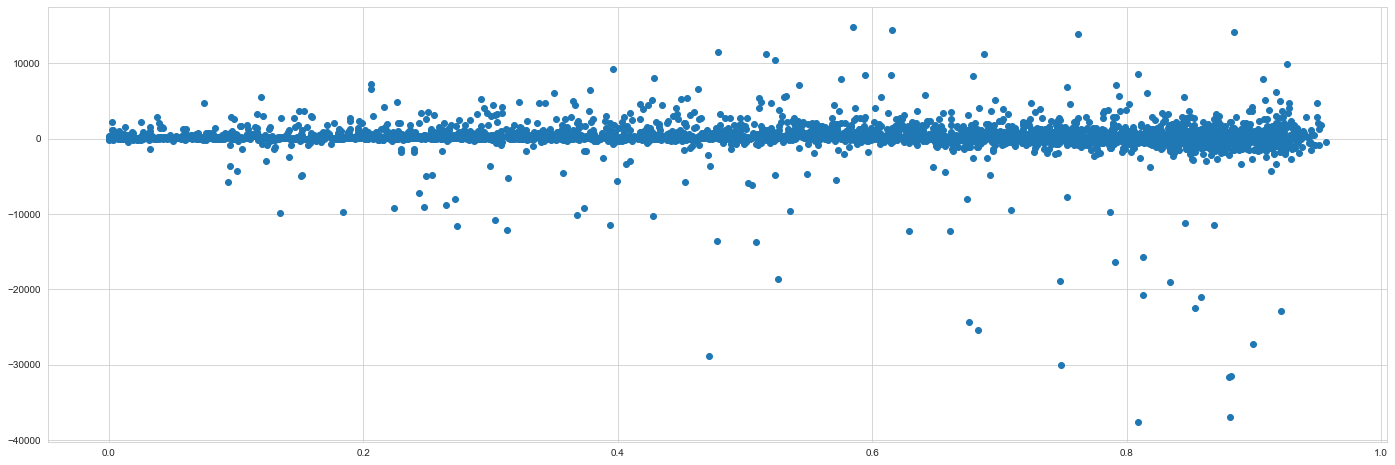

In [59]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.idx_accessibility, hex_corr.T_Pob_10_20)

In [60]:
x = np.array(hex_corr.idx_accessibility)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[ 1.        , -0.04256963],
       [-0.04256963,  1.        ]])

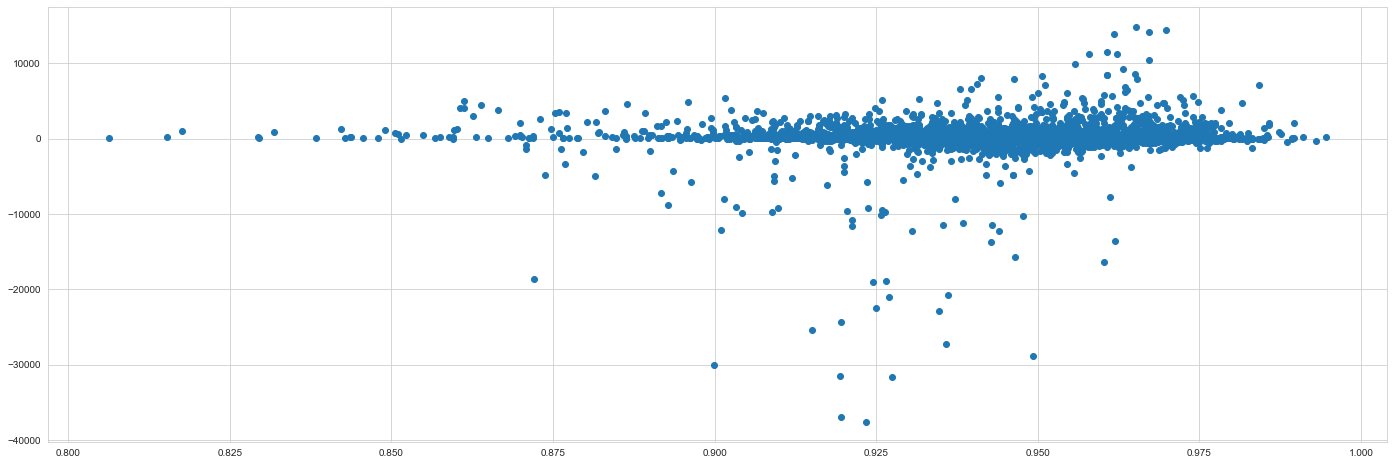

In [61]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.imn_2020, hex_corr.T_Pob_10_20)

In [62]:
x = np.array(hex_corr.imn_2020)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[1.        , 0.08072622],
       [0.08072622, 1.        ]])

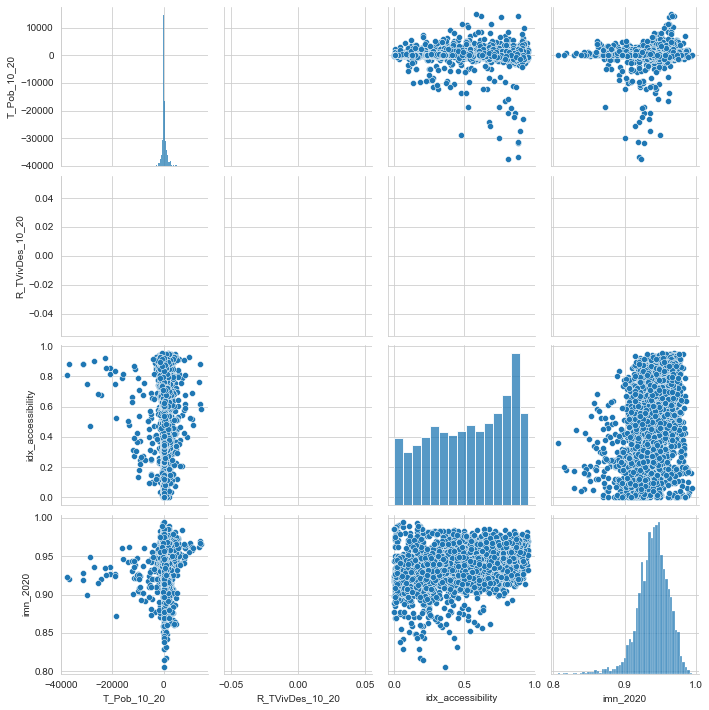

In [63]:
import seaborn as sns

sns.set_style('whitegrid')
sns.pairplot(hex_corr, palette='deep')
plt.show()

In [64]:
hex_corr['Grado_Marg'] = np.nan
hex_corr.loc[hex_corr.imn_2020>=0.966338 , 'Grado_Marg'] = 'Muy bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.946436 )&
             (hex_corr.imn_2020<0.966338), 'Grado_Marg'] = 'Bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.926536)&
             (hex_corr.imn_2020<0.946436), 'Grado_Marg'] = 'Medio'
hex_corr.loc[(hex_corr.imn_2020>=0.8999)&
             (hex_corr.imn_2020<0.926536), 'Grado_Marg'] = 'Alto'
hex_corr.loc[hex_corr.imn_2020 < 0.8999, 'Grado_Marg'] = 'Muy alto'

<AxesSubplot:>

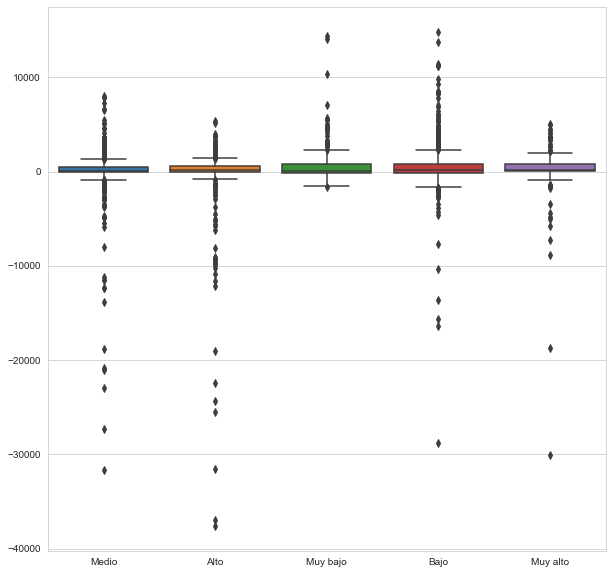

In [65]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x=np.array(hex_corr.Grado_Marg) , y=np.array(hex_corr.T_Pob_10_20), ax=ax)

In [66]:
hex_corr.groupby('Grado_Marg').agg(['median','mean','std'])

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


T_Pob_10_20                          R_TVivDes_10_20           \
                median        mean          std          median mean std   
Grado_Marg                                                                 
Alto             166.0  -99.200278  3324.756608             NaN  NaN NaN   
Bajo             151.0  423.891509  2096.784178             NaN  NaN NaN   
Medio            124.0   78.972993  2117.991846             NaN  NaN NaN   
Muy alto         197.0   65.806897  3520.561892             NaN  NaN NaN   
Muy bajo         117.0  628.492021  1635.575363             NaN  NaN NaN   

           idx_accessibility                      imn_2020                      
                      median      mean       std    median      mean       std  
Grado_Marg                                                                      
Alto                0.325757  0.375230  0.260445  0.918988  0.917199  0.007062  
Bajo                0.744939  0.672981  0.226645  0.954561  0.955032  0.005647  
Medio               0.539496  0.520329  0.256908  0.937268  0.937240  0.005518  
Muy alto            0.234767  0.261860  0.197367  0.884725  0.878476  0.019914  
Muy bajo            0.735679  0.634084  0.279136  0.971711  0.973070  0.005622

In [67]:
hex_corr['Nivel_Acc'] = np.nan
hex_corr.loc[hex_corr.idx_accessibility>=0.75 , 'Nivel_Acc'] = 'Alto'
hex_corr.loc[(hex_corr.idx_accessibility>=0.50 )&
             (hex_corr.idx_accessibility<0.75), 'Nivel_Acc'] = 'Medio'
hex_corr.loc[(hex_corr.idx_accessibility>=0.25)&
             (hex_corr.idx_accessibility<0.50), 'Nivel_Acc'] = 'Bajo'
hex_corr.loc[hex_corr.idx_accessibility < 0.25, 'Nivel_Acc'] = 'Muy bajo'

In [68]:
#categorical data
cat_list = ['Alto','Medio','Bajo','Muy bajo']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_corr['Nivel_Acc'] = hex_corr['Nivel_Acc'].astype(cat_size_order)
hex_corr = hex_corr.sort_values('Nivel_Acc')

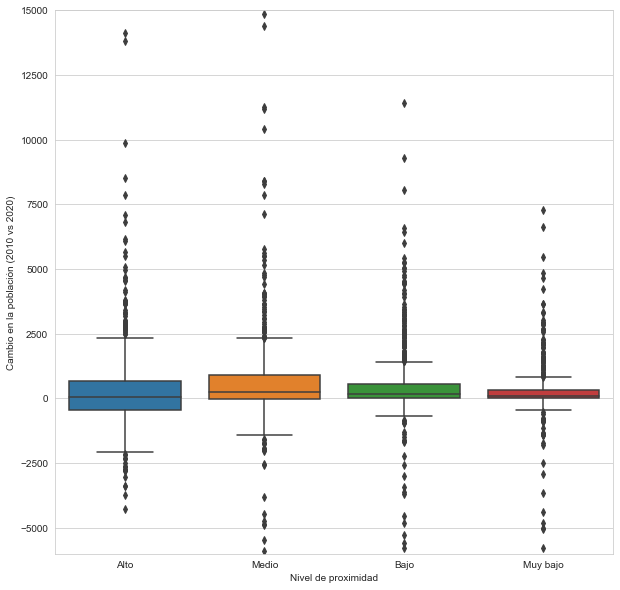

In [70]:
fig, ax = plt.subplots(figsize=(10,10))

x = np.array(hex_corr.Nivel_Acc)
y = np.array(hex_corr.T_Pob_10_20)

sns.boxplot(x=x , y=y, ax=ax)

plt.xlabel('Nivel de proximidad')
plt.ylabel('Cambio en la población (2010 vs 2020)')
ax.set_ylim([-6000,15000])

plt.savefig(f'../data/processed/pop_chng/{c}_BoxPlot_PopChange_ProximityGrpup_res{res}.svg')

In [63]:
hex_corr.groupby('Nivel_Acc').agg(['median','mean','std'])

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


T_Pob_10_20                          R_TVivDes_10_20           \
               median        mean          std          median mean std   
Nivel_Acc                                                                 
Alto             60.0  -48.344734  3141.660518             NaN  NaN NaN   
Bajo            179.0  326.910550  1988.738849             NaN  NaN NaN   
Medio           263.0  374.631692  2536.432375             NaN  NaN NaN   
Muy bajo         83.5  206.515363  1212.042127             NaN  NaN NaN   

          idx_accessibility                      imn_2020                      
                     median      mean       std    median      mean       std  
Nivel_Acc                                                                      
Alto               0.854928  0.851438  0.050853  0.952032  0.950366  0.015319  
Bajo               0.374448  0.374892  0.072778  0.936357  0.935158  0.021704  
Medio              0.635020  0.632084  0.072383  0.942736  0.941969  0.018405  
Muy bajo           0.130105  0.125579  0.078253  0.926818  0.926369  0.026426

In [64]:
x = np.array(hex_corr.imn_2020).reshape((1,-1))
y = np.array(hex_corr.idx_accessibility).reshape((1,-1))
np.corrcoef(x, y)

array([[1.        , 0.40627597],
       [0.40627597, 1.        ]])

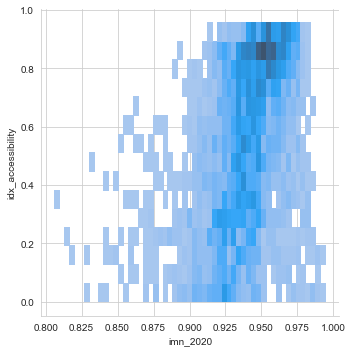

In [65]:
sns.displot(hex_corr, x='imn_2020',y='idx_accessibility')